One Class Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static lp as classifier
Execution time:  0.40547069099999966
Average MCC:  0.9157908992182129
Average error: 4.408500000000018
Average macro-F1: 0.9557936210716035
Average micro-F1: 0.9562
Average Accuracy:  95.59149999999998
Standard Deviation:  1.501596067522821
Variance:  2.2547907500000006


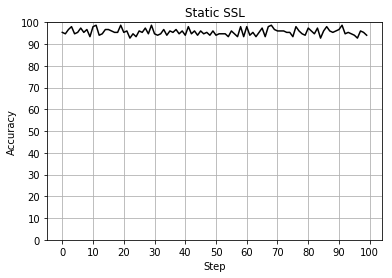

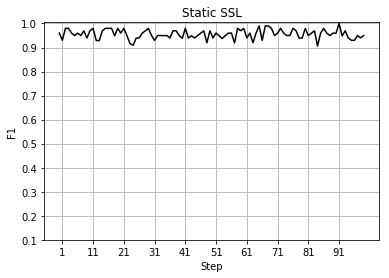

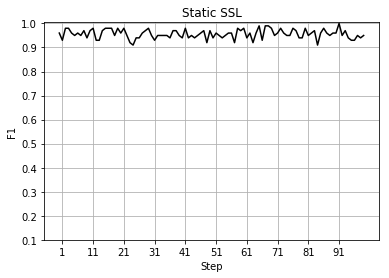




METHOD: Sliding lp as classifier
Execution time:  0.3697761599999998
Average MCC:  0.9887401784095323
Average error: 0.5266999999999769
Average macro-F1: 0.9942770665255469
Average micro-F1: 0.9943000000000002
Average Accuracy:  99.47330000000002
Standard Deviation:  1.4329445592904144
Variance:  2.05333011


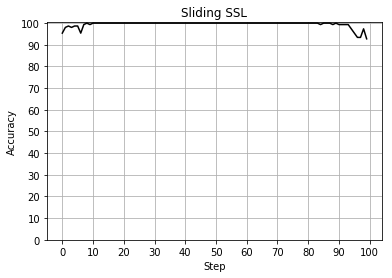

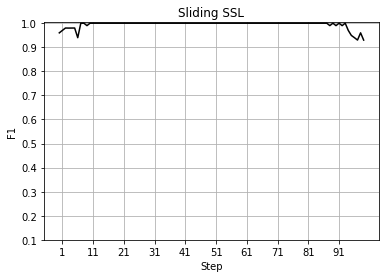

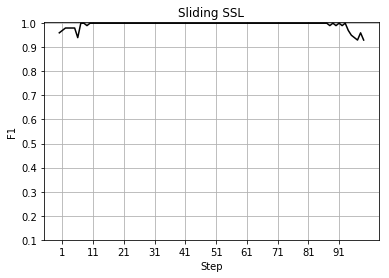




METHOD: Incremental lp as classifier
Execution time:  4.437716931999999
Average MCC:  0.9360588440629811
Average error: 3.355399999999989
Average macro-F1: 0.9667986117072508
Average micro-F1: 0.9671000000000001
Average Accuracy:  96.64460000000001
Standard Deviation:  1.3338173937987166
Variance:  1.7790688400000005


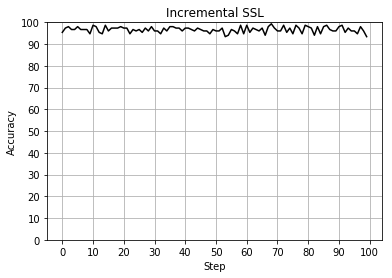

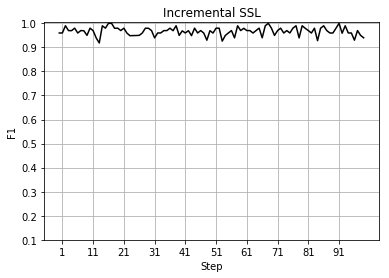

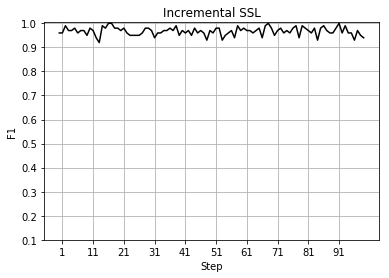




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.7119351550000008
Average MCC:  0.9930830719681905
Average error: 0.32910000000003947
Average macro-F1: 0.9964899308229538
Average micro-F1: 0.9964999999999997
Average Accuracy:  99.67089999999996
Standard Deviation:  0.9828785225041806
Variance:  0.9660501900000011


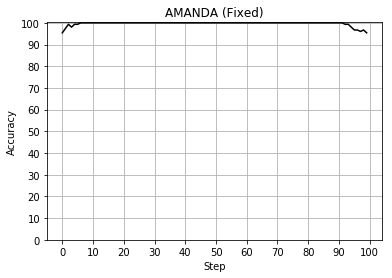

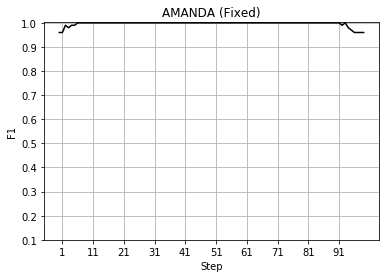

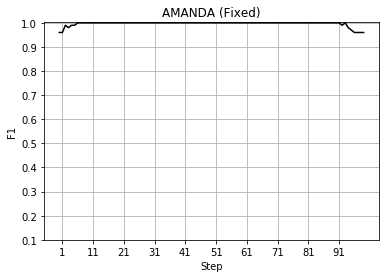




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.30 | Std keeping percentage=0.19
Execution time:  0.929545491999999
Average MCC:  0.9881838935341584
Average error: 0.5592000000000183
Average macro-F1: 0.9938791138304235
Average micro-F1: 0.9939
Average Accuracy:  99.44079999999998
Standard Deviation:  1.62278752768192
Variance:  2.633439359999998


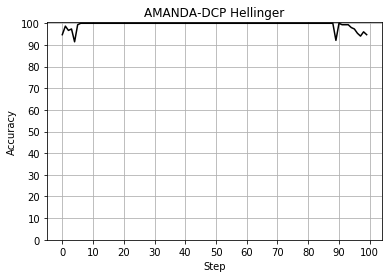

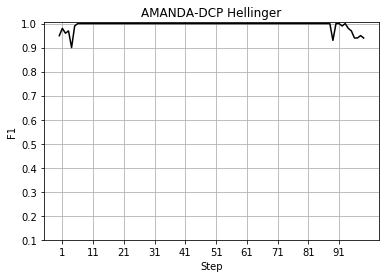

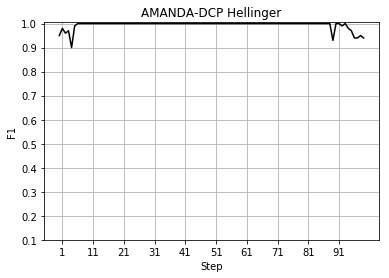




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.22 | Std keeping percentage=0.04
Execution time:  0.7517421370000008
Average MCC:  0.9923191095313371
Average error: 0.34890000000002885
Average macro-F1: 0.9960871521856849
Average micro-F1: 0.9961
Average Accuracy:  99.65109999999997
Standard Deviation:  1.0630935001212263
Variance:  1.1301677899999998


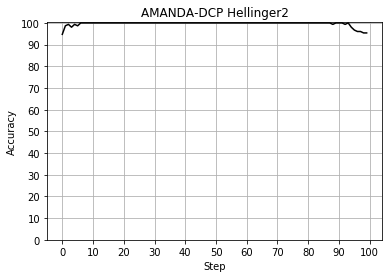

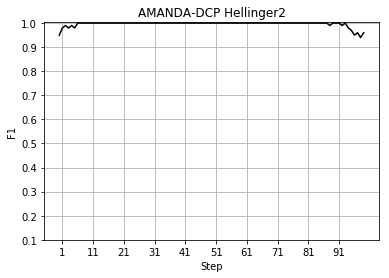

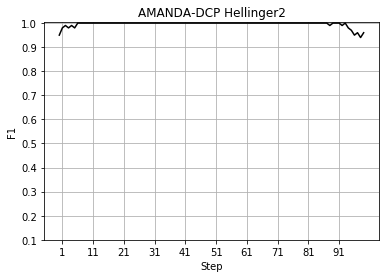




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.21 | Std keeping percentage=0.06
Execution time:  0.8220485969999984
Average MCC:  0.9915939224402923
Average error: 0.4080000000000297
Average macro-F1: 0.9956819390198686
Average micro-F1: 0.9956999999999999
Average Accuracy:  99.59199999999997
Standard Deviation:  1.2647980075885639
Variance:  1.599714000000001


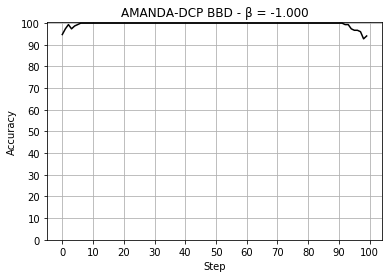

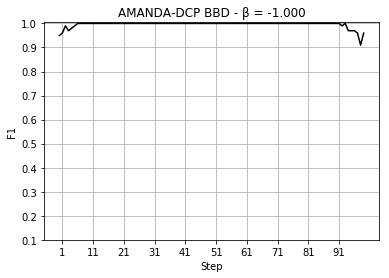

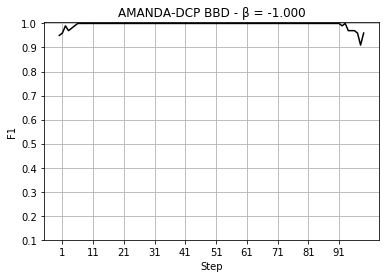




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.15 | Std keeping percentage=0.04
Execution time:  0.6255870529999967
Average MCC:  0.9922577081828434
Average error: 0.3488000000000113
Average macro-F1: 0.9960868284443272
Average micro-F1: 0.9960999999999999
Average Accuracy:  99.65119999999999
Standard Deviation:  1.0505743952714628
Variance:  1.1037065599999998


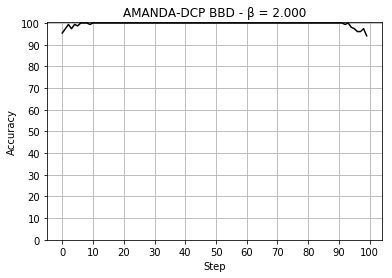

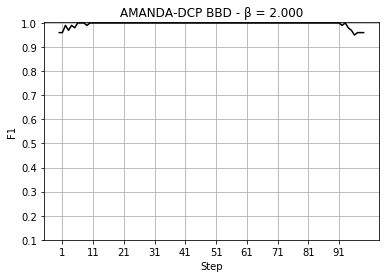

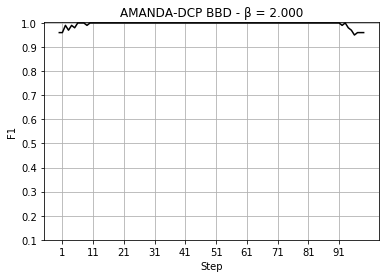




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.17 | Std keeping percentage=0.05
Execution time:  0.692190765000003
Average MCC:  0.9906340465264456
Average error: 0.43430000000002167
Average macro-F1: 0.9951770161882852
Average micro-F1: 0.9952
Average Accuracy:  99.56569999999998
Standard Deviation:  1.3128939446886028
Variance:  1.72369051


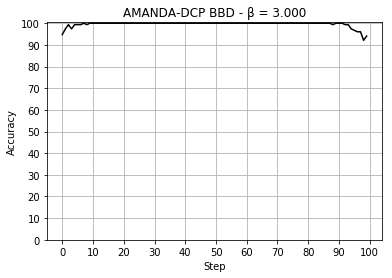

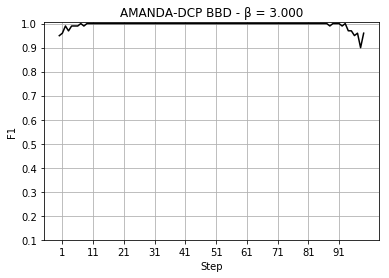

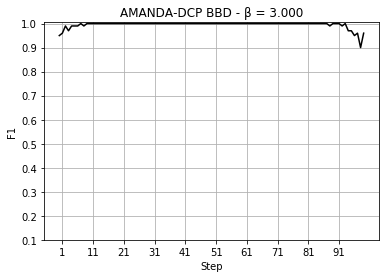




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.18 | Std keeping percentage=0.05
Execution time:  0.7105389779999989
Average MCC:  0.9918030388864348
Average error: 0.40140000000002374
Average macro-F1: 0.9957834432613234
Average micro-F1: 0.9957999999999998
Average Accuracy:  99.59859999999998
Standard Deviation:  1.2548689333950382
Variance:  1.574696040000001


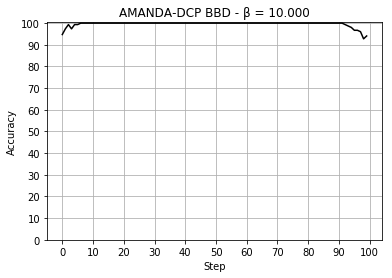

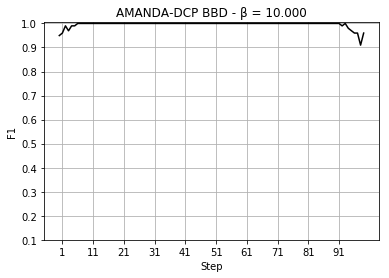

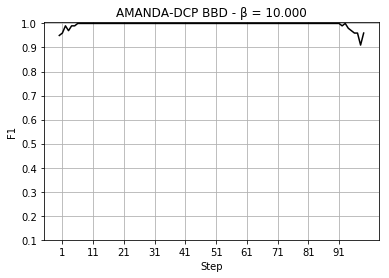

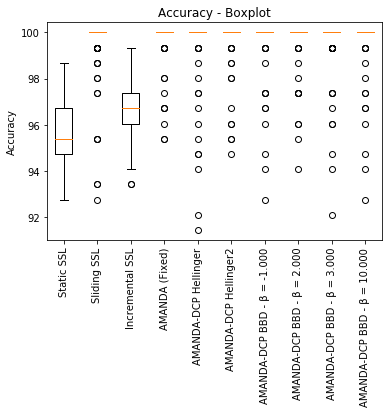

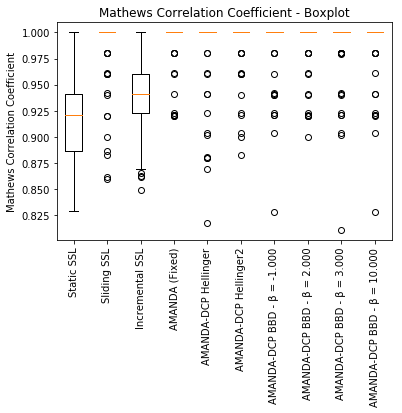

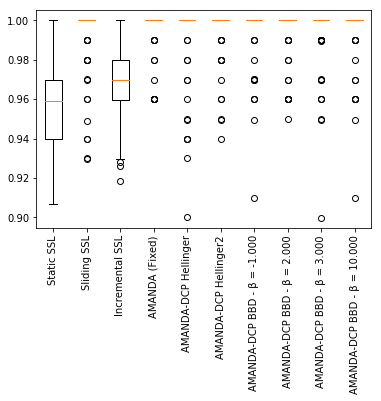

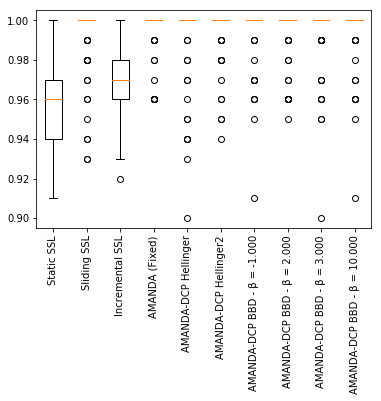

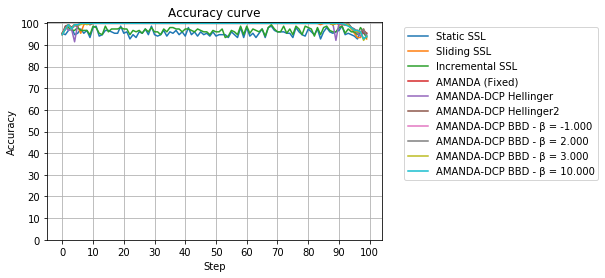

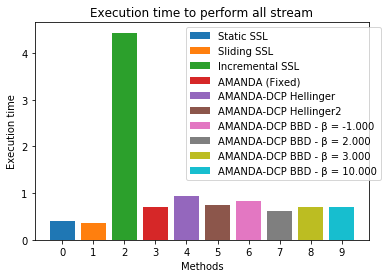

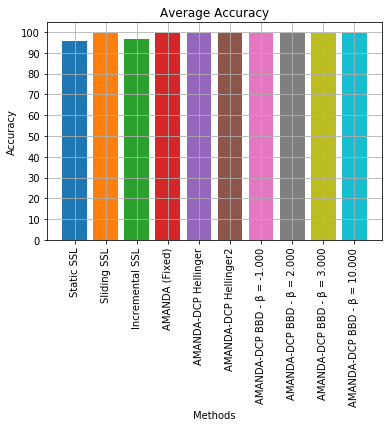

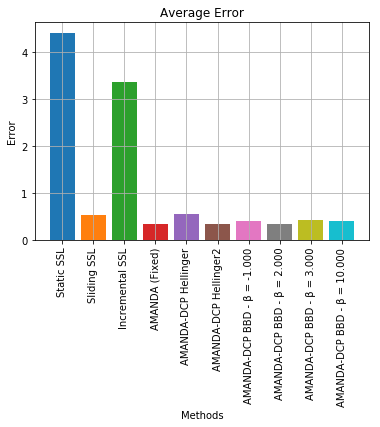

Pos 7 - Error reduction (Sliding SSL):4.060821307333855
Pos 9 - Error reduction (Incremental SSL):1.1016669892197832
Pos 1 - Error reduction (AMANDA (Fixed)):4.26753424729184
Pos 8 - Error reduction (AMANDA-DCP Hellinger):4.026822468524922
Pos 3 - Error reduction (AMANDA-DCP Hellinger2):4.246821108571358
Pos 5 - Error reduction (AMANDA-DCP BBD - β = -1.000):4.184995527845038
Pos 2 - Error reduction (AMANDA-DCP BBD - β = 2.000):4.246925720383096
Pos 6 - Error reduction (AMANDA-DCP BBD - β = 3.000):4.157482621362775
Pos 4 - Error reduction (AMANDA-DCP BBD - β = 10.000):4.1918999074185415


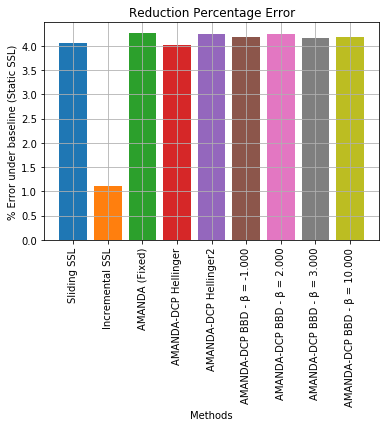

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCHT(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 4, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 4, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 4, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 4, 0.85, "kde", clfName=sslClassifier)

   # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 7, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [12, 4, 11, 12]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier, 'HDDDM')

    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()